**Forecast the CocaCola prices and Airlines Passengers data set.**

Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.

## **CocaCola sales**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models
from datetime import datetime,time
import warnings
import itertools
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
from pylab import rcParams
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf

In [2]:
#Load the dataset
coca = pd.read_excel('/content/CocaCola_Sales_Rawdata.xlsx')
print(coca.head())

  Quarter        Sales
0   Q1_86  1734.827000
1   Q2_86  2244.960999
2   Q3_86  2533.804993
3   Q4_86  2154.962997
4   Q1_87  1547.818996


In [3]:
coca1 = coca.copy()
coca1.head().T

,0,1,2,3,4
Quarter,Q1_86,Q2_86,Q3_86,Q4_86,Q1_87
Sales,1734.827,2244.960999,2533.804993,2154.962997,1547.818996


**EDA**

In [4]:
coca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [5]:
coca.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,42.0,2994.353308,977.930896,1547.818996,2159.714247,2782.376999,3609.25,5253.0


In [6]:
coca.shape

(42, 2)

In [7]:
coca1.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [8]:
temp = coca1.Quarter.str.replace(r'(Q\d)_(\d+)', r'19\2-\1')
coca1['quater'] = pd.to_datetime(temp).dt.strftime('%b-%Y')

In [9]:
coca1.head()

,Quarter,Sales,quater
0,Q1_86,1734.827000,Jan-1986
1,Q2_86,2244.960999,Apr-1986
2,Q3_86,2533.804993,Jul-1986
3,Q4_86,2154.962997,Oct-1986
4,Q1_87,1547.818996,Jan-1987


In [10]:
coca1 = coca1.drop(['Quarter'], axis=1)
coca1.reset_index(inplace=True)

In [11]:
coca1['quater'] = pd.to_datetime(coca1['quater'])
coca1 = coca1.set_index('quater')

**Visualization**

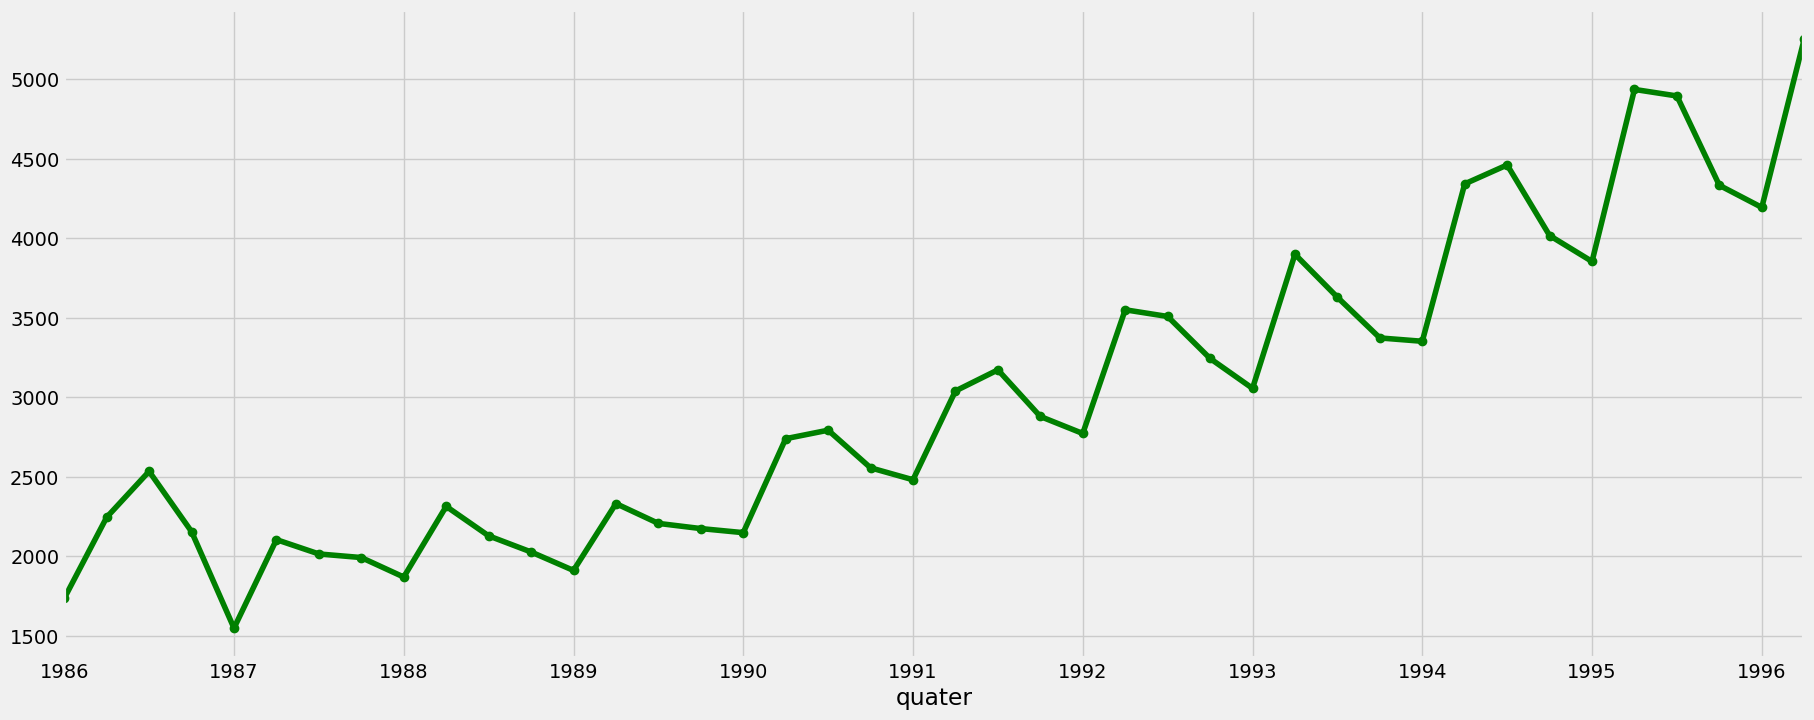

In [12]:
coca1['Sales'].plot(figsize=(20, 8),color='green',marker='o')
plt.show()

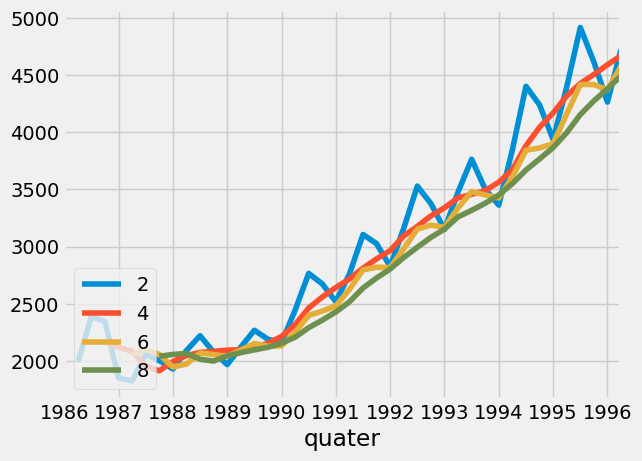

In [13]:
for i in range(2,10,2):
    coca1["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

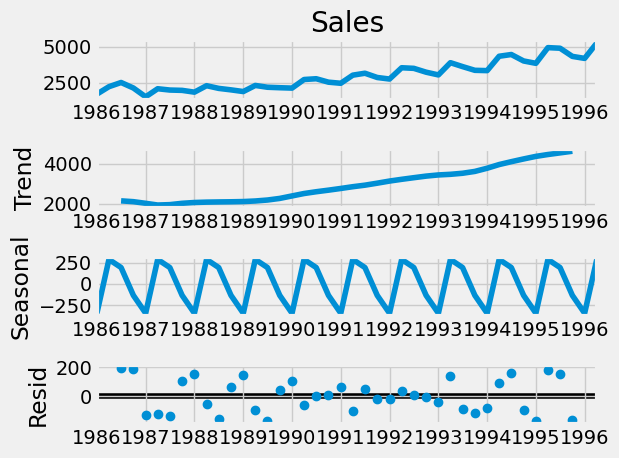

In [14]:
ts_add = seasonal_decompose(coca1.Sales,model="additive")
fig = ts_add.plot()
plt.show()

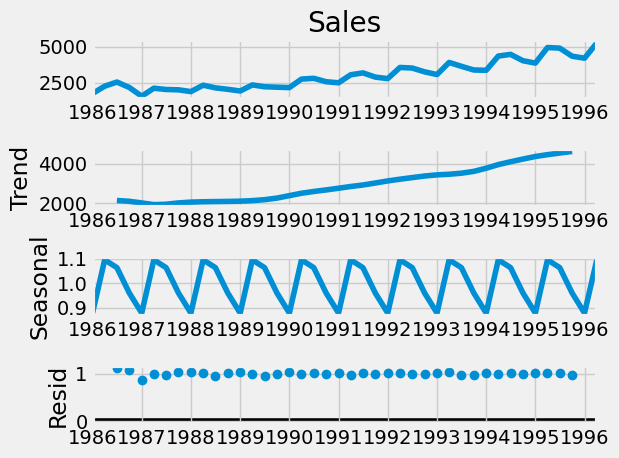

In [15]:
ts_mul = seasonal_decompose(coca1.Sales,model="multiplicative")
fig = ts_mul.plot()
plt.show()

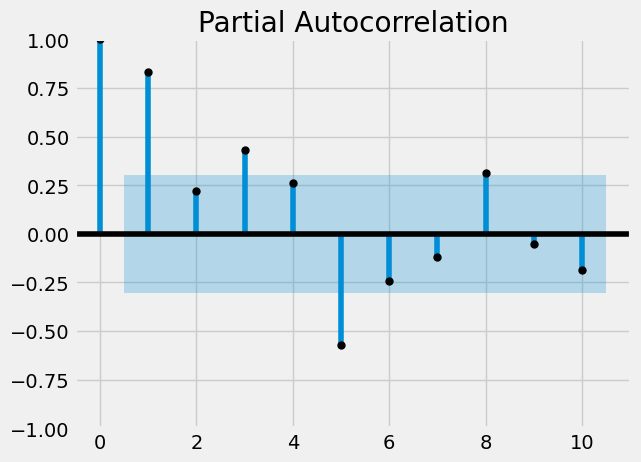

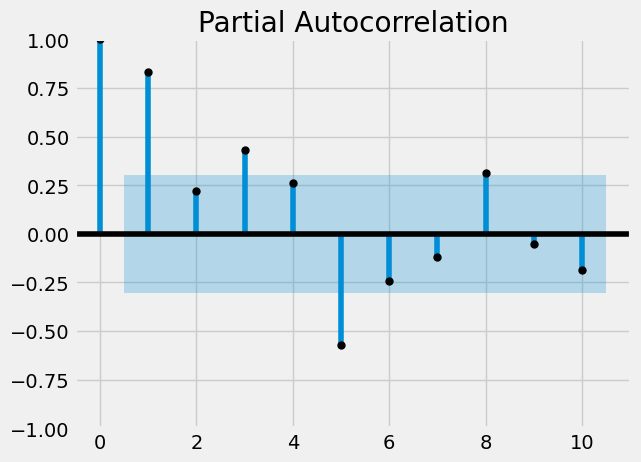

In [16]:
tsa_plots.plot_pacf(coca1.Sales, lags=10,color='black')

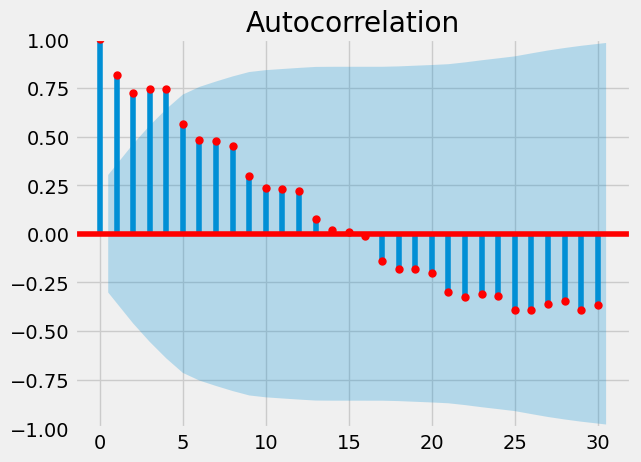

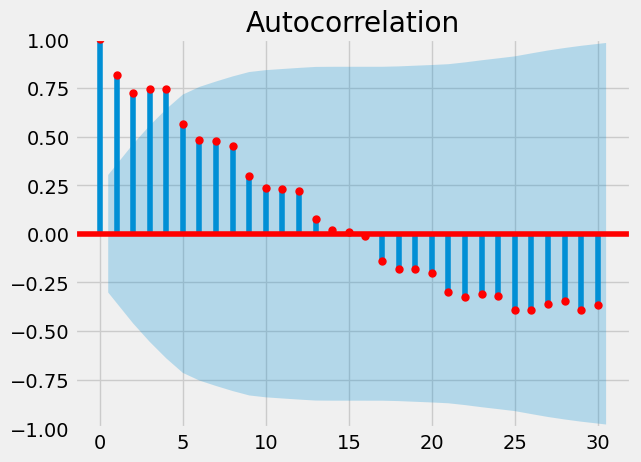

In [17]:
tsa_plots.plot_acf(coca1.Sales, lags=30,color='red')

**Building Time series forecasting with ARIMA**

In [18]:
X = coca1['Sales'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]

In [19]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train, order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   27
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -174.082
Date:                Sun, 23 Apr 2023   AIC                            360.163
Time:                        12:34:21   BIC                            367.712
Sample:                             0   HQIC                           362.337
                                 - 27                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1024      0.306     -0.335      0.738      -0.702       0.497
ar.L2         -0.2140      0.160     -1.338      0.181      -0.527       0.099
ar.L3         -0.0892      0.191     -0.468      0.6

In [20]:
#This summarizes the coefficient values used as well as the skill of the fit on the on the in-sample observations

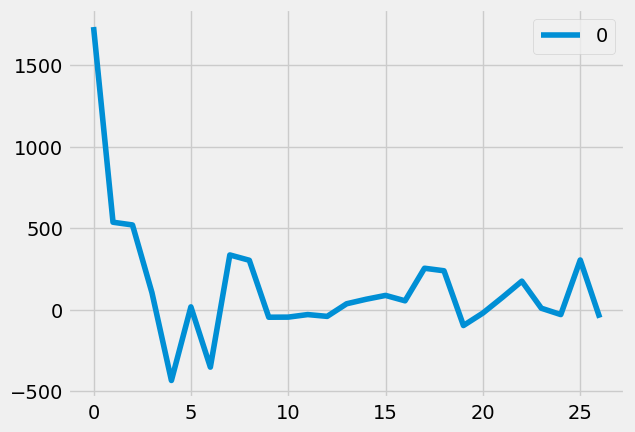

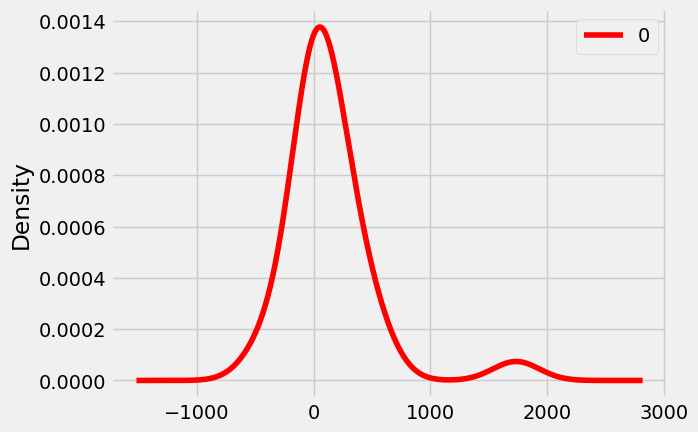

                 0
count    27.000000
mean    137.791854
std     385.970462
min    -433.659591
25%     -34.938856
50%      55.067398
75%     247.080157
max    1734.827000


In [21]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde',color='red')
pyplot.show()
print(residuals.describe())

**The plot of the residual errors suggests that there may still be some trend information not captured by the model**

The results show that indeed there is a bias in the prediction (a non-zero mean in the residuals)

# **3.1 - Rolling Forecast ARIMA Model**

In [22]:
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs)) 

predicted=3130.132560, expected=3243.859993
predicted=3167.315971, expected=3056.000000
predicted=3717.472606, expected=3899.000000
predicted=3775.837500, expected=3629.000000
predicted=3332.744953, expected=3373.000000
predicted=3258.575374, expected=3352.000000
predicted=4081.006044, expected=4342.000000
predicted=3955.784129, expected=4461.000000
predicted=4146.277764, expected=4017.000000
predicted=3958.436605, expected=3854.000000
predicted=4701.652928, expected=4936.000000
predicted=4990.071243, expected=4895.000000
predicted=4390.352764, expected=4333.000000
predicted=4190.945470, expected=4194.000000
predicted=5177.006981, expected=5253.000000


In [23]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 34279.908


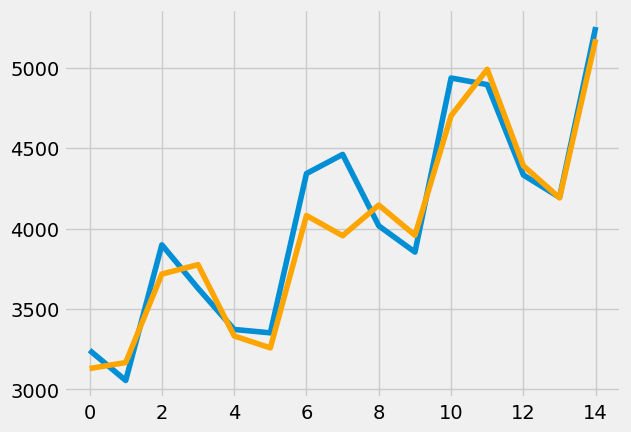

In [24]:
pyplot.plot(test)
pyplot.plot(predictions, color='orange')
pyplot.show()


A line plot is created showing the expected values (blue) compared to the rolling forecast predictions (red). We can see the values show some trend and are in the correct scale

# **4 - Comparing Multiple Models**

In [25]:
coca2 = pd.get_dummies(coca, columns = ['Quarter'])
coca2.columns = ['Sales','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2',
                 'Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4']
coca2.head().T

,0,1,2,3,4
Sales,1734.827,2244.960999,2533.804993,2154.962997,1547.818996
Q1,1.000,0.000000,0.000000,0.000000,0.000000
Q1,0.000,0.000000,0.000000,0.000000,1.000000
Q1,0.000,0.000000,0.000000,0.000000,0.000000
Q1,0.000,0.000000,0.000000,0.000000,0.000000
Q1,0.000,0.000000,0.000000,0.000000,0.000000
Q1,0.000,0.000000,0.000000,0.000000,0.000000
Q1,0.000,0.000000,0.000000,0.000000,0.000000
Q1,0.000,0.000000,0.000000,0.000000,0.000000
Q1,0.000,0.000000,0.000000,0.000000,0.000000


In [26]:
t= np.arange(1,43)
coca2['t'] = t
coca2['t_sq'] = coca2['t']*coca2['t']
log_Sales=np.log(coca2['Sales'])
coca2['log_Sales']=log_Sales
coca2.head().T

,0,1,2,3,4
Sales,1734.827000,2244.960999,2533.804993,2154.962997,1547.818996
Q1,1.000000,0.000000,0.000000,0.000000,0.000000
Q1,0.000000,0.000000,0.000000,0.000000,1.000000
Q1,0.000000,0.000000,0.000000,0.000000,0.000000
Q1,0.000000,0.000000,0.000000,0.000000,0.000000
Q1,0.000000,0.000000,0.000000,0.000000,0.000000
Q1,0.000000,0.000000,0.000000,0.000000,0.000000
Q1,0.000000,0.000000,0.000000,0.000000,0.000000
Q1,0.000000,0.000000,0.000000,0.000000,0.000000
Q1,0.000000,0.000000,0.000000,0.000000,0.000000


In [27]:
train1, test1 = np.split(coca2, [int(.67 *len(coca2))])

In [28]:
linear= smf.ols('Sales ~ t',data=train1).fit()
predlin=pd.Series(linear.predict(pd.DataFrame(test1['t'])))
rmselin=np.sqrt((np.mean(np.array(test1['Sales'])-np.array(predlin))**2))
rmselin

580.1224130918635

In [29]:
quad=smf.ols('Sales~t+t_sq',data=train1).fit()
predquad=pd.Series(quad.predict(pd.DataFrame(test1[['t','t_sq']])))
rmsequad=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(predquad))**2))
rmsequad

783.7297975037553

In [30]:
expo=smf.ols('log_Sales~t',data=train1).fit()
predexp=pd.Series(expo.predict(pd.DataFrame(test1['t'])))
rmseexpo=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(predexp)))**2))
rmseexpo

588.1405104900199

In [31]:
additive= smf.ols('Sales~ Q1+Q2+Q3+Q4',data=train1).fit()
predadd=pd.Series(additive.predict(pd.DataFrame(test1[['Q1','Q2','Q3','Q4']])))
rmseadd=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(predadd))**2))
rmseadd

1869.7188209186954

In [32]:
addlinear= smf.ols('Sales~t+Q1+Q2+Q3+Q4',data=train1).fit()
predaddlinear=pd.Series(addlinear.predict(pd.DataFrame(test1[['t','Q1','Q2','Q3','Q4']])))
rmseaddlinear=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(predaddlinear))**2))
rmseaddlinear

596.1526282372298

In [33]:
addquad=smf.ols('Sales~t+t_sq+Q1+Q2+Q3+Q4',data=train1).fit()
predaddquad=pd.Series(addquad.predict(pd.DataFrame(test1[['t','t_sq','Q1','Q2','Q3','Q4']])))
rmseaddquad=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(predaddquad))**2))
rmseaddquad

412.1144436053725

In [34]:
mulsea=smf.ols('log_Sales~Q1+Q2+Q3+Q4',data=train1).fit()
predmul= pd.Series(mulsea.predict(pd.DataFrame(test1[['Q1','Q2','Q3','Q4']])))
rmsemul= np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(predmul)))**2))
rmsemul

2374.9194407954424

In [35]:
mullin= smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data=train1).fit()
predmullin= pd.Series(mullin.predict(pd.DataFrame(test1[['t','Q1','Q2','Q3','Q4']])))
rmsemulin=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(predmullin)))**2))
rmsemulin

5359.6879119332325

In [36]:
mul_quad= smf.ols('log_Sales~t+t_sq+Q1+Q2+Q3+Q4',data=train1).fit()
pred_mul_quad= pd.Series(mul_quad.predict(test1[['t','t_sq','Q1','Q2','Q3','Q4']]))
rmse_mul_quad=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(pred_mul_quad)))**2))
rmse_mul_quad

3630.56194673477

**Conclusion**

In [37]:
output = {'Model':pd.Series(['rmse_mul_quad','rmseadd','rmseaddlinear','rmseaddquad','rmseexpo','rmselin','rmsemul','rmsemulin','rmsequad']),
          'Values':pd.Series([rmse_mul_quad,rmseadd,rmseaddlinear,rmseaddquad,rmseexpo,rmselin,rmsemul,rmsemulin,rmsequad])}
rmse = pd.DataFrame(output)
print(rmse)

           Model       Values
0  rmse_mul_quad  3630.561947
1        rmseadd  1869.718821
2  rmseaddlinear   596.152628
3    rmseaddquad   412.114444
4       rmseexpo   588.140510
5        rmselin   580.122413
6        rmsemul  2374.919441
7      rmsemulin  5359.687912
8       rmsequad   783.729798


**Additive seasonality with quadratic trend has the best RMSE value**

# **Airlines Passanger Dataset**

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.graphics.tsaplots as tsa_plots
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as smf

In [39]:
air = pd.read_excel('/content/Airlines+Data.xlsx')
air.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [40]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [41]:
air.describe().T

,count,mean,std,min,25%,50%,75%,max
Passengers,96.0,213.708333,71.918216,104.0,156.0,200.0,264.75,413.0


In [42]:
air.shape

(96, 2)

In [43]:
air[air.duplicated()]

,Month,Passengers


In [44]:
air.set_index('Month', inplace=True)
air

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


<Axes: ylabel='Density'>

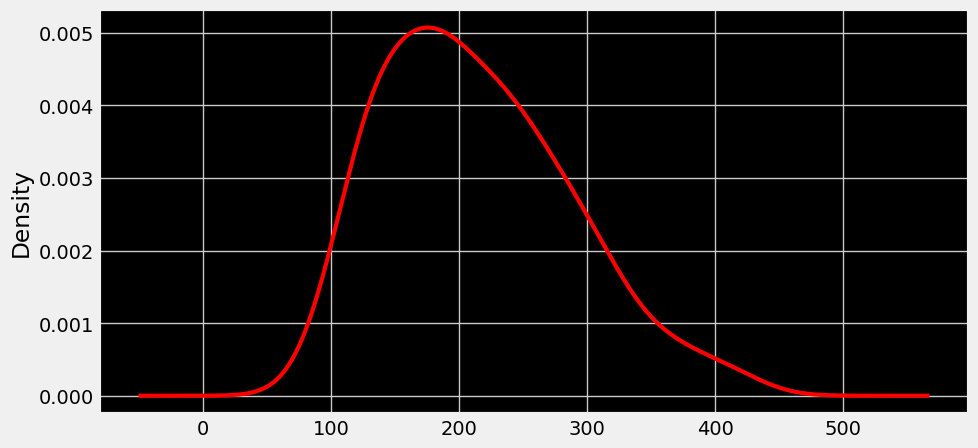

In [45]:
# density plot
ax = plt.axes()
ax.set_facecolor("black")
air['Passengers'].plot(kind='kde',figsize=(10,5),color='red',linewidth=3)

<Axes: xlabel='Month'>

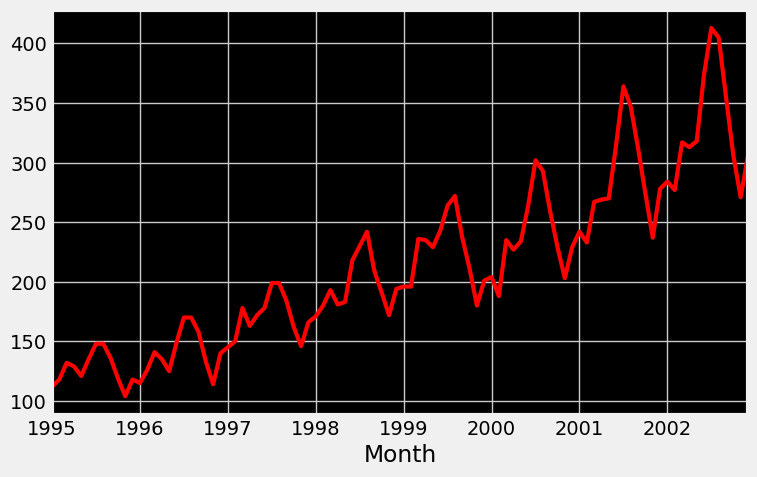

In [46]:
# Lineplot for Passengers
plt.figure(figsize=(8,5))
ax = plt.axes()
ax.set_facecolor("black")
air['Passengers'].plot(figsize=(8,5),color='red',linewidth=3)

<Axes: >

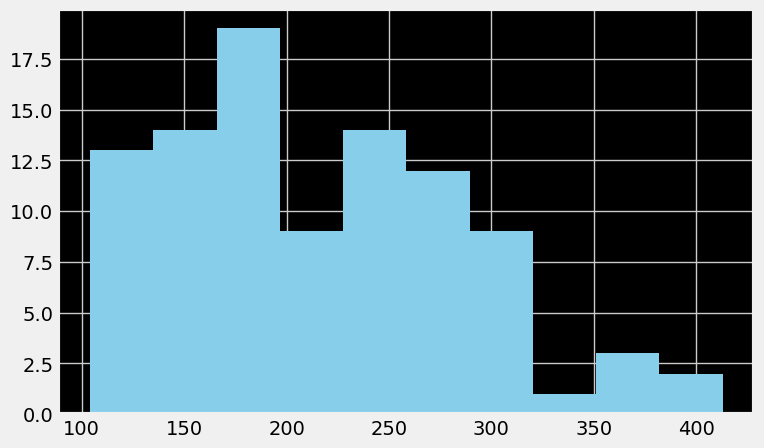

In [47]:
# Histogram
ax = plt.axes()
ax.set_facecolor("black")
air['Passengers'].hist(figsize=(8,5),color='skyblue')

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

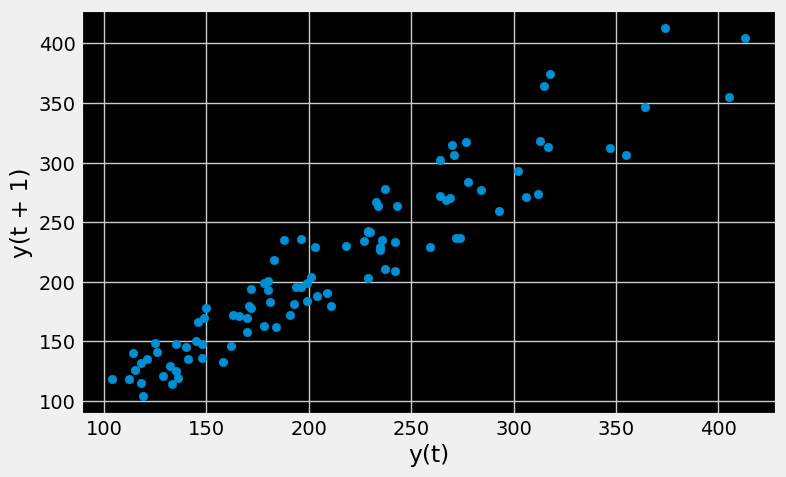

In [48]:
# Lagplot
from pandas.plotting import lag_plot

plt.figure(figsize=(8,5))
ax = plt.axes()
ax.set_facecolor("black")
lag_plot(air['Passengers'])

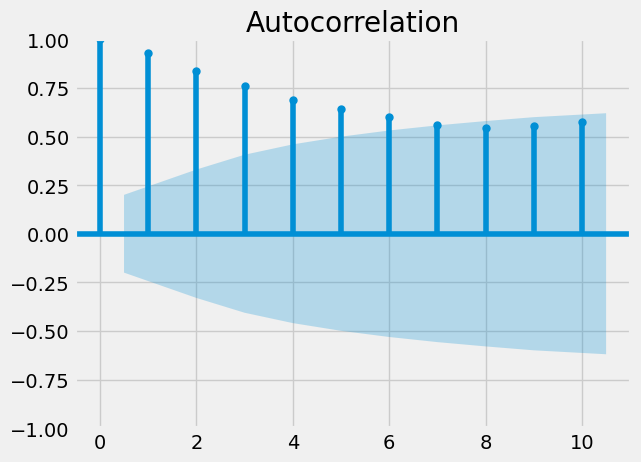

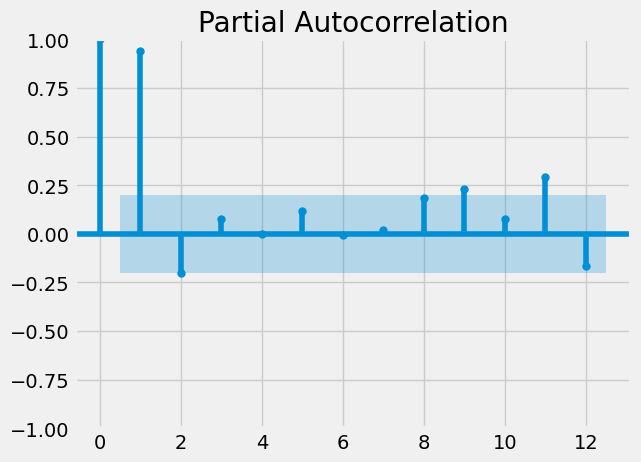

In [49]:
# lag plot
tsa_plots.plot_acf(air.Passengers,lags=10)
tsa_plots.plot_pacf(air.Passengers,lags=12)
plt.show()

In [50]:
#data driven forcating method
# splitting data into Train and Test
Train = air.head(84)
Train

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2001-08-01,347
2001-09-01,312
2001-10-01,274


In [51]:
Test = air.tail(12)
Test

,Passengers
Month,
2002-01-01,284
2002-02-01,277
2002-03-01,317
2002-04-01,313
2002-05-01,318
2002-06-01,374
2002-07-01,413
2002-08-01,405
2002-09-01,355


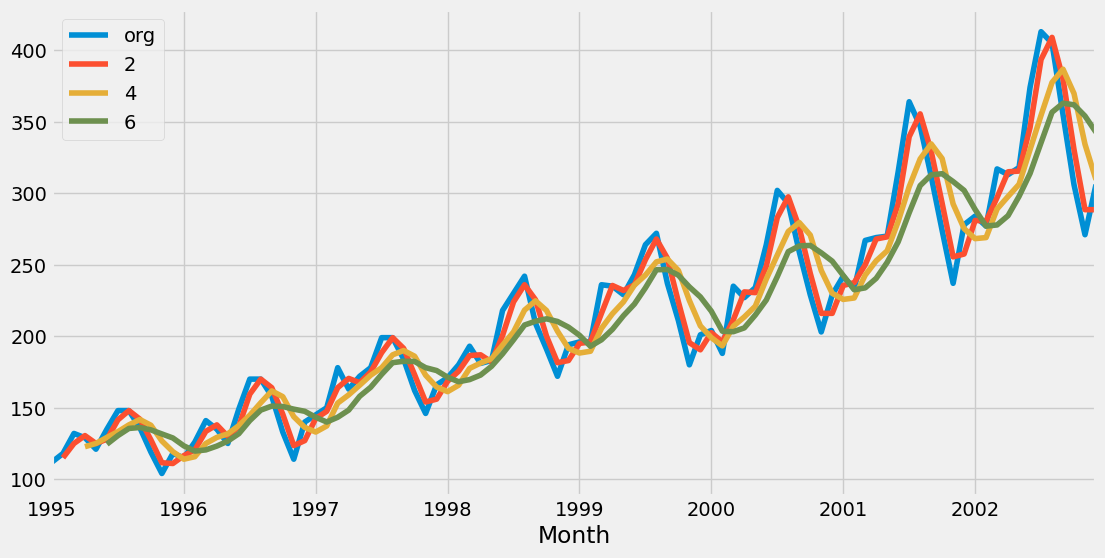

In [52]:
# moving average method
plt.figure(figsize=(12,6))
air.Passengers.plot(label="org")
for i in range(2,8,2):
    air["Passengers"].rolling(i).mean().plot(label=str(i))
    plt.legend(loc="best")

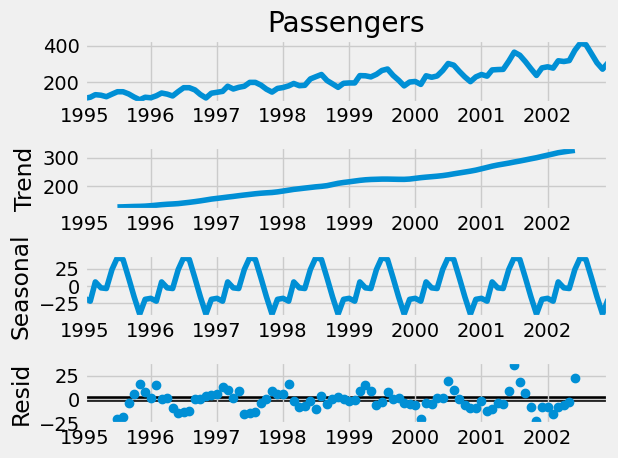

In [53]:
# tiem series decomposition plot
decompose_ts_add=seasonal_decompose(air.Passengers,period=12)
decompose_ts_add.plot()
plt.show()

In [54]:
def RMSE(org,pred):
    rmse = np.sqrt(np.mean((np.array(org)-np.array(pred))**2))
    return rmse

In [55]:
# simple exponential method
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit()
pred_ses = ses_model.predict(start=Test.index[0],end=Test.index[-1])
rmse_ses_model = RMSE(Test.Passengers,pred_ses)
rmse_ses_model

68.00674031349585

In [56]:
# holt method
hw_model = Holt(Train["Passengers"]).fit()
pre_hw = hw_model.predict(start=Test.index[0],end=Test.index[-1])
rmse_hw_model = RMSE(Test.Passengers,pre_hw)
rmse_hw_model

58.57776020000329

In [57]:
# holts winter exponential smoothing with additive seasonality and additive trend
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=4).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start=Test.index[0],end=Test.index[-1])
rmse_hwe_add_add_model = RMSE(Test.Passengers,pred_hwe_add_add)
rmse_hwe_add_add_model

63.14440376379176

In [58]:
hwe_model_mul_add=ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=4).fit() 
pred_hwe_mul_add=hwe_model_mul_add.predict(start=Test.index[0],end=Test.index[-1])
rmse_hwe_model_mul_add_model=RMSE(Test.Passengers,pred_hwe_mul_add)
rmse_hwe_model_mul_add_model

64.7248143801876

In [59]:
air1 = air.copy()
air1

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [60]:
# model based forcasting method & data preprocessing for models
air1["t"] = np.arange(1,97)
air1["t_squared"] = air1["t"]*air1["t"]
air1["log_Passengers"] = np.log(air1["Passengers"])
air1

,Passengers,t,t_squared,log_Passengers
Month,,,,
1995-01-01,112,1,1,4.718499
1995-02-01,118,2,4,4.770685
1995-03-01,132,3,9,4.882802
1995-04-01,129,4,16,4.859812
1995-05-01,121,5,25,4.795791
...,...,...,...,...
2002-08-01,405,92,8464,6.003887
2002-09-01,355,93,8649,5.872118
2002-10-01,306,94,8836,5.723585


In [61]:
# splitting data into Train and Test
Train = air1.head(84)
Test = air1.tail(12)

In [62]:
# linear model
linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear_model = RMSE(Test['Passengers'],pred_linear)
rmse_linear_model

53.19923653480278

In [63]:
# exponential model
Exp = smf.ols('log_Passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp_model = RMSE(Test['Passengers'],np.exp(pred_Exp))
rmse_Exp_model

46.05736110315654

In [64]:
# quadratic Model
Quad = smf.ols('Passengers~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad_model = RMSE(Test['Passengers'],pred_Quad)
rmse_Quad_model

48.05188897933164

In [65]:
series = air.copy()
series

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [66]:
# separate out a validation dataset
split_point = len(series)-12
dataset,validation = series[0:split_point],series[split_point:]
print('Dataset %d,Validation %d' % (len(dataset),len(validation)))
dataset.to_csv('dataset.csv',header=False)
validation.to_csv('validation.csv',header=False)

Dataset 84,Validation 12


In [67]:
# evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt

In [68]:
# load data
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.715)
train, test = X[0:train_size], X[train_size:]

In [69]:
print(train.shape)
print(test.shape)

(60,)
(24,)


In [70]:
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=201.000, Expected=204.000
>Predicted=204.000, Expected=188.000
>Predicted=188.000, Expected=235.000
>Predicted=235.000, Expected=227.000
>Predicted=227.000, Expected=234.000
>Predicted=234.000, Expected=264.000
>Predicted=264.000, Expected=302.000
>Predicted=302.000, Expected=293.000
>Predicted=293.000, Expected=259.000
>Predicted=259.000, Expected=229.000
>Predicted=229.000, Expected=203.000
>Predicted=203.000, Expected=229.000
>Predicted=229.000, Expected=242.000
>Predicted=242.000, Expected=233.000
>Predicted=233.000, Expected=267.000
>Predicted=267.000, Expected=269.000
>Predicted=269.000, Expected=270.000
>Predicted=270.000, Expected=315.000
>Predicted=315.000, Expected=364.000
>Predicted=364.000, Expected=347.000
>Predicted=347.000, Expected=312.000
>Predicted=312.000, Expected=274.000
>Predicted=274.000, Expected=237.000
>Predicted=237.000, Expected=278.000
RMSE: 29.058


In [71]:
rmse_Persistence_model = 29.058 

In [72]:
series = pd.read_excel("Airlines+Data.xlsx",header=0,index_col=0,parse_dates=True)
series

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [73]:
# separate out a validation dataset
split_point = len(series)-12
dataset,validation = series[0:split_point],series[split_point:]
print('Dataset %d,Validation %d' % (len(dataset),len(validation)))
dataset.to_csv('dataset.csv',header=False)
validation.to_csv('validation.csv',header=False)

Dataset 84,Validation 12


In [74]:
# grid search ARIMA parameters for a time series

import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [75]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [76]:
# load dataset
train = pd.read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
p_values = range(0, 5)
d_values = range(0, 5)
q_values = range(0, 5)
warnings.filterwarnings("ignore")
evaluate_models(train.values, p_values, d_values, q_values)

Best ARIMANone RMSE=inf


In [77]:
rmse_ARIMA_model = 24.650

In [78]:
# load data
train = pd.read_csv('dataset.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

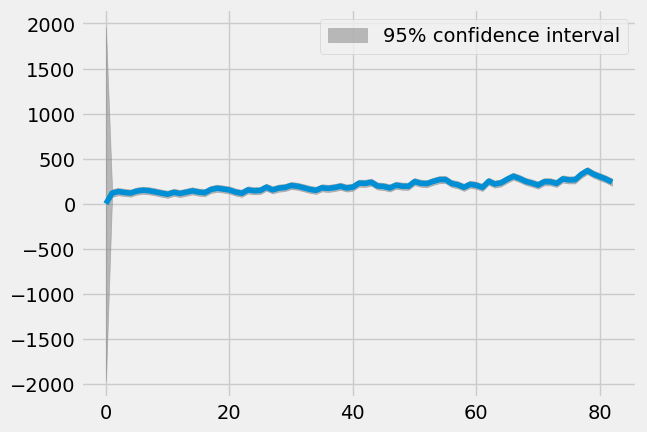

In [79]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
# fit model
model = ARIMA(X, order=(3,1,0))
model_fit = model.fit()
forecast=model_fit.forecast(steps=12)[0]
plot_predict(model_fit)
plt.show()

In [80]:
# fit model
series = pd.read_excel("Airlines+Data.xlsx",header=0,index_col=0,parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

In [81]:
model = ARIMA(X, order=(0,1,4))
model_fit = model.fit()

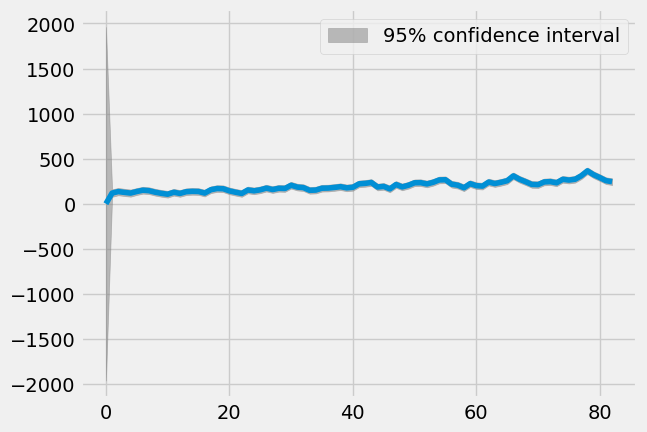

In [82]:
forecast=model_fit.forecast(steps=12)[0]
plot_predict(model_fit)
plt.show()

In [83]:
forecast

295.2414835577484

In [84]:
list = [['Simple Exponential Method',rmse_ses_model], ['Holt method',rmse_hw_model],
          ['HW exp smoothing add',rmse_hwe_add_add_model],['HW exp smoothing mult',rmse_hwe_model_mul_add_model],
          ['Linear Mode',rmse_linear_model],['Exp model',rmse_Exp_model],['Quad model',rmse_Quad_model],
          ['Persistence/ Base model', rmse_Persistence_model], ['ARIMA Model',rmse_ARIMA_model]]

In [85]:
df = pd.DataFrame(list, columns =['Model', 'RMSE_Value']) 
df

,Model,RMSE_Value
0,Simple Exponential Method,68.006740
1,Holt method,58.577760
2,HW exp smoothing add,63.144404
3,HW exp smoothing mult,64.724814
4,Linear Mode,53.199237
5,Exp model,46.057361
6,Quad model,48.051889
7,Persistence/ Base model,29.058000
8,ARIMA Model,24.650000


**ARIMA Model has the least RMSE value, hence we can go with ARIMA Model**